### Lets prepare Data for Analysis

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
uber_15=pd.read_csv(r'uber-pickups-in-new-york-city\uber-raw-data-janjune-15.csv',encoding= 'utf-8')

In [4]:
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [5]:
uber_15.shape

(14270479, 4)

#### Preparación de los datos: Necesitamos buscar los datos duplicados, perdidos y anómalos.

In [6]:
#duplicated
uber_15.duplicated().sum()

898225

In [7]:
#drop duplicates
uber_15.drop_duplicates(inplace=True)

In [8]:
# cambio en el numero de filas
uber_15.shape

(13372254, 4)

### 1. ¿Cual mes tiene el maximo número de viajes de Uber en New York?

* voy a necesitar dos datos: mes(month) y numeros de viajes (count).
*  el mes puedo extraerlo de la columna Pickup_date

In [9]:
# observo el tipo de dato de cada columna
uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

#### Pickup_date es de tipo **object** y hay que convertirlo a **date_time**. 

In [10]:
uber_15['Pickup_date'] = pd.to_datetime(uber_15['Pickup_date'], format= '%Y-%m-%d %H:%M:%S')

In [11]:
uber_15['Pickup_date'].dtype

dtype('<M8[ns]')

In [12]:
#observamos como se transformaron los datos a datetime
uber_15['Pickup_date']

0          2015-05-17 09:47:00
1          2015-05-17 09:47:00
2          2015-05-17 09:47:00
3          2015-05-17 09:47:00
4          2015-05-17 09:47:00
                   ...        
14270474   2015-05-08 15:43:00
14270475   2015-05-08 15:43:00
14270476   2015-05-08 15:43:00
14270477   2015-05-08 15:44:00
14270478   2015-05-08 15:44:00
Name: Pickup_date, Length: 13372254, dtype: datetime64[ns]

In [13]:
#se agrega una columna con el mes
uber_15['month'] = uber_15['Pickup_date'].dt.month

In [14]:
uber_15.head(3)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month
0,B02617,2015-05-17 09:47:00,B02617,141,5
1,B02617,2015-05-17 09:47:00,B02617,65,5
2,B02617,2015-05-17 09:47:00,B02617,100,5


In [15]:
#se agrupan los viajes por mes
uber_15['month'].value_counts()

6    2571771
5    2483980
2    2222189
4    2112705
3    2062639
1    1918970
Name: month, dtype: int64

<AxesSubplot:>

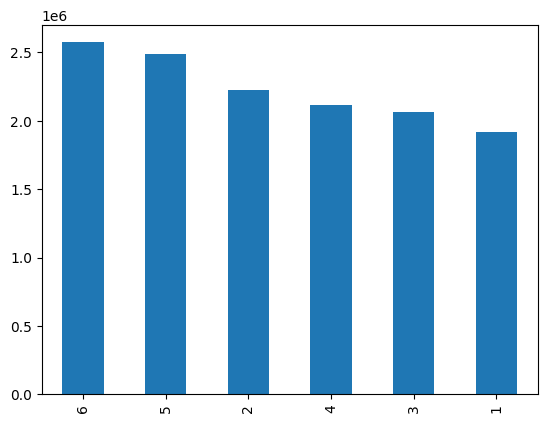

In [16]:
#con un grafico de barras podemos observar la cantidad de viajes por mes	
uber_15['month'].value_counts().plot(kind='bar')

#### Encontrar los viajes totales de cada mes y cada dia de la semana.

Para resolver esto se necesita el mes, el dia de la semana y un conteo (count).

Primero se va a crear las columnas **weekday**(día de la semana), **day**(dia), **hour**(hora), **month**(mes, ya creado), **minute** (minuto).

In [18]:
uber_15['weekday']= uber_15['Pickup_date'].dt.day_name()
uber_15['day']= uber_15['Pickup_date'].dt.day
uber_15['hour']= uber_15['Pickup_date'].dt.hour
uber_15['month']= uber_15['Pickup_date'].dt.month
uber_15['minute']= uber_15['Pickup_date'].dt.minute

In [20]:
#Se observa como quedaron las nuevas columnas
uber_15.head(2)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day,hour,minute
0,B02617,2015-05-17 09:47:00,B02617,141,5,Sunday,17,9,47
1,B02617,2015-05-17 09:47:00,B02617,65,5,Sunday,17,9,47


In [21]:
# Se agrupa por month y weekday (features), con el método size (retorna el numero de filas como unas serie)
uber_15.groupby(['month','weekday']).size()

month  weekday  
1      Friday       339285
       Monday       190606
       Saturday     386049
       Sunday       230487
       Thursday     330319
       Tuesday      196574
       Wednesday    245650
2      Friday       373550
       Monday       274948
       Saturday     368311
       Sunday       296130
       Thursday     335603
       Tuesday      287260
       Wednesday    286387
3      Friday       309631
       Monday       269931
       Saturday     314785
       Sunday       313865
       Thursday     277026
       Tuesday      320634
       Wednesday    256767
4      Friday       315002
       Monday       238429
       Saturday     324545
       Sunday       273560
       Thursday     372522
       Tuesday      250632
       Wednesday    338015
5      Friday       430134
       Monday       255501
       Saturday     464298
       Sunday       390391
       Thursday     337607
       Tuesday      290004
       Wednesday    316045
6      Friday       371225
       Mond

In [22]:
#¿Qué tipo de estructura es? Una serie! =)
type(uber_15.groupby(['month','weekday']).size())

pandas.core.series.Series

In [24]:
temp=uber_15.groupby(['month','weekday'], as_index=False).size()
temp.head()

,month,weekday,size
0,1,Friday,339285
1,1,Monday,190606
2,1,Saturday,386049
3,1,Sunday,230487
4,1,Thursday,330319


In [26]:
# utilizando "as_index=False" sigue siendo un data Frame, si usamos as_index=True lo pasa a serie.
type(temp)

pandas.core.frame.DataFrame

#### Se necesita reemplazar el numero del mes por el nombre

In [27]:
# cuantos meses diferentes hay
temp['month'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

#### Se va a definir un diccionario para guardar los datos, donde la clave va a ser el numero de mes y el valor el nombre del diccionario.

In [28]:
dict_month = {1:'January', 2:'February',3:'March', 4:'April', 5:'May', 6:'June'}

In [29]:
# La función Python Pandas Series. map() sustituye los valores de una Serie. Los valores sustituidos pueden derivarse de una Series , un diccionario o una función. Esta función funciona sólo para una Series .
temp['month']=temp['month'].map(dict_month)

In [30]:
# se reemplazo el mes en número por el nombre
temp['month']

0      January
1      January
2      January
3      January
4      January
5      January
6      January
7     February
8     February
9     February
10    February
11    February
12    February
13    February
14       March
15       March
16       March
17       March
18       March
19       March
20       March
21       April
22       April
23       April
24       April
25       April
26       April
27       April
28         May
29         May
30         May
31         May
32         May
33         May
34         May
35        June
36        June
37        June
38        June
39        June
40        June
41        June
Name: month, dtype: object

In [31]:
#Se observa el mes, el dia y la cantidad de viajes
temp

,month,weekday,size
0,January,Friday,339285
1,January,Monday,190606
2,January,Saturday,386049
3,January,Sunday,230487
4,January,Thursday,330319
5,January,Tuesday,196574
6,January,Wednesday,245650
7,February,Friday,373550
8,February,Monday,274948
9,February,Saturday,368311


<AxesSubplot:xlabel='month', ylabel='size'>

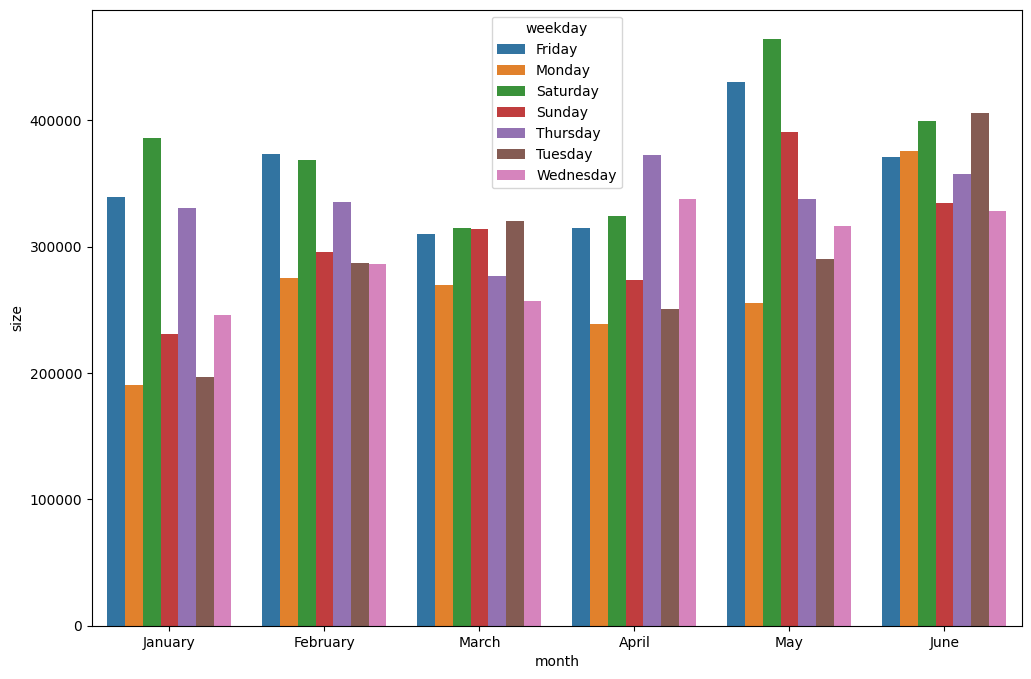

In [35]:
#graficamos
plt.figure(figsize=(12,8))
sns.barplot(x='month', y='size', hue='weekday', data=temp)

### Encontrar las horas picos en New York de todos los dias.

* necesitamos ver por día y hora cuantos viajes se realizan

In [36]:
uber_15.groupby(['weekday','hour']).count()

Dispatching_base_num  Pickup_date  Affiliated_base_num  \
weekday   hour                                                           
Friday    0                    79879        79879                78936   
          1                    44563        44563                44064   
          2                    27252        27252                26942   
          3                    19076        19076                18845   
          4                    23049        23049                22798   
...                              ...          ...                  ...   
Wednesday 19                  131317       131317               129724   
          20                  123490       123490               122022   
          21                  120941       120941               119511   
          22                  115208       115208               113909   
          23                   91631        91631                90740   

                locationID   month     day  minute  
weekday   hour                                      
Friday    0          79879   79879   79879   79879  
          1          44563   44563   44563   44563  
          2          27252   27252   27252   27252  
          3          19076   19076   19076   19076  
          4          23049   23049   23049   23049  
...                    ...     ...     ...     ...  
Wednesday 19        131317  131317  131317  131317  
          20        123490  123490  123490  123490  
          21        120941  120941  120941  120941  
          22        115208  115208  115208  115208  
          23         91631   91631   91631   91631  

[168 rows x 7 columns]

In [39]:
summary=uber_15.groupby(['weekday','hour'],as_index=False).size() #similar a lo anterior, pero solo me da las columnas que necesito.
# si bien esto es una serie con as_index=False se convierte en un Data Frame
summary

,weekday,hour,size
0,Friday,0,79879
1,Friday,1,44563
2,Friday,2,27252
3,Friday,3,19076
4,Friday,4,23049
...,...,...,...
163,Wednesday,19,131317
164,Wednesday,20,123490
165,Wednesday,21,120941
166,Wednesday,22,115208


<AxesSubplot:xlabel='hour', ylabel='size'>

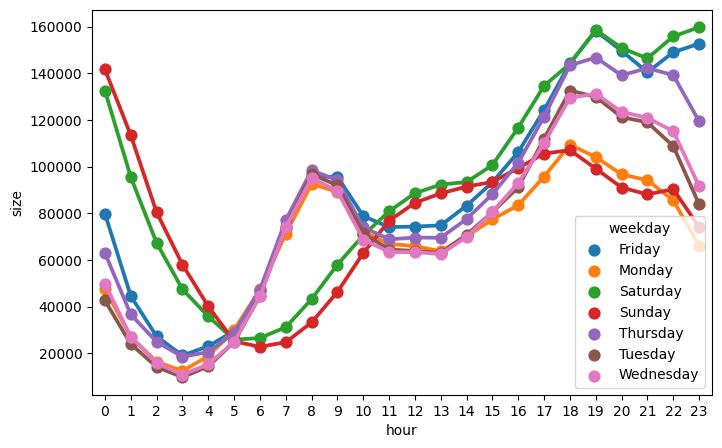

In [41]:
#usamos pointplot modificado con una lineplot
plt.figure(figsize=(8,5))
sns.pointplot(x='hour', y='size',hue='weekday', data=summary)

#### Observaciones:

* De manera general se puede ver que el máximo uso del servicio se hace durante la tarde-noche.
* La mínima cantidad de viajes se hacen durante la madrugada.
* Durante los dias laborables (lunes a viernes), el máximo matutino se encuentra entre 7 y 9 (horario de entrada laboral) y luego empieza subir nuevamente a partir de las 17 hs (horario de salida).
* El fin de semana presenta un comportamiento similar hasta las 16 hs, donde en el día sábado continua aumentando, llegando a sus picos máximos a las 19 y 23 horas (son tambien máximos totales), en cambio durante el domingo empiezan a decrecer, seguramente porque no hay tantas salidas ya que el dia siguiente (lunes), es laborable.
* El día viernes presenta el mismo comportamiento vespertino-nocturno que el dia sábado.

#### ¿Cuál es la base que tiene más números de vehículos activos?

* Se ingesta otra base de datos.

In [44]:
uber_foil= pd.read_csv(r'uber-pickups-in-new-york-city\Uber-Jan-Feb-FOIL.csv')

In [45]:
uber_foil.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [49]:
base_high =uber_foil.groupby(['dispatching_base_number','active_vehicles','trips'],as_index=False).size()

base_high.max()

#### Para obtener los cinco puntos básicos de estadística: mínimo, máximo, mediana, quartil 25 y quartil 75, de puede utilizar boxplot y violin plot. Para ver la distribución de los valores distplot.

In [ ]:
#descargamos los paquetes:
!pip install chart_studio
!pip install plotly

In [54]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly_express as px
from plotly.offline import download_plotlyjs, plot, iplot,init_notebook_mode
init_notebook_mode(connected= True)

In [ ]:
!pip install --upgrade nbformat

In [57]:
px.box(x='dispatching_base_number', y='active_vehicles', data_frame=uber_foil)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'dispatching_base_number=%{x}<br>active_vehicles=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x': array(['B02512', 'B02765', 'B02764', ..., 'B02682', 'B02512', 'B02765'],
                         dtype=object),
              'x0': ' ',
              'xaxis': 'x',
              'y': array([ 190,  225, 3427, ..., 1386,  230,  747], dtype=int64),
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'dispatching_base_number'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'active_vehicles'}}}
})